In [728]:
import os  #getting access to input data
import pandas as pd #Importing pandas for performing Exploratory Data Analysis(EDA)
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # for data Visualizations
import datetime
import scipy.stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm

In [729]:
# setting up the working directory.
os.chdir("C:\\Users\\ASUS\\Downloads\\Compressed")
os.getcwd()

'C:\\Users\\ASUS\\Downloads\\Compressed'

In [730]:
#Loading the data:
train  = pd.read_csv("train_cab.csv",na_values={"pickup_datetime":"43"}) # pickup_datatime format is not in proper order, so dropping
test   = pd.read_csv("test.csv")

In [731]:
train.shape, test.shape

((16067, 7), (9914, 6))

In [732]:
train.nunique()

fare_amount            468
pickup_datetime      16020
pickup_longitude     13789
pickup_latitude      14241
dropoff_longitude    13887
dropoff_latitude     14263
passenger_count         27
dtype: int64

In [733]:
train.head(15)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [734]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [735]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [736]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

# Data Cleaning & Missing Value Analysis

In [737]:
#Convert fare_amount from object to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  #Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [738]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [739]:
# Data cleaning.
train['passenger_count'].value_counts(), test['passenger_count'].value_counts()

(1.00       11259
 2.00        2322
 5.00        1045
 3.00         676
 4.00         329
 6.00         302
 0.00          57
 43.00          2
 53.00          2
 0.12           1
 1.30           1
 531.20         1
 345.00         1
 456.00         1
 87.00          1
 55.00          1
 58.00          1
 236.00         1
 535.00         1
 536.00         1
 537.00         1
 554.00         1
 5334.00        1
 35.00          1
 5345.00        1
 557.00         1
 354.00         1
 Name: passenger_count, dtype: int64,
 1    6914
 2    1474
 5     696
 3     447
 4     206
 6     177
 Name: passenger_count, dtype: int64)

In [740]:
# fare amount cannot be less than 1,the passenger count maxiumum is 6 if considring an SUV,passengr count cannot be less than one.
sum(train['fare_amount']<1),sum(train['passenger_count']>6),sum(train['passenger_count']<1) # so filtering out those observation which satisfies the above condition.

(5, 20, 58)

In [741]:
##finding decending order of fare to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)


1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 16067, dtype: float64

In [742]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1.0


In [743]:
#Hence dropping one value of >90
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [744]:
train[train['pickup_latitude']<-180]
train[train['pickup_latitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [745]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [746]:
train[train['dropoff_latitude']<-180]
train[train['dropoff_latitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [747]:
# latitude and longitude cannot be comprised of Zero value, so filtering up the values.
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train[i]==0)))


pickup_longitude equal to 0=315
pickup_latitude equal to 0=315
dropoff_longitude equal to 0=314
dropoff_latitude equal to 0=312


In [748]:
train=train.drop(train[train['fare_amount']<1].index,axis=0)
train=train.drop(train[train['fare_amount']>453].index,axis=0)
train=train.drop(train[train['passenger_count']>6].index,axis=0)
train=train.drop(train[train['passenger_count']<1].index,axis=0)
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    train=train.drop(train[train[i]==0].index,axis=0)



after removing all the wrong data points.


In [749]:
sum(train['fare_amount']<1),sum(train['passenger_count']>6),sum(train['passenger_count']<1),sum(train['fare_amount']>453)

(0, 0, 0, 0)

In [750]:
train['passenger_count'].value_counts()

1.0    11013
2.0     2286
5.0     1025
3.0      663
4.0      320
6.0      296
1.3        1
Name: passenger_count, dtype: int64

In [751]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train[i]==0)))

pickup_longitude equal to 0=0
pickup_latitude equal to 0=0
dropoff_longitude equal to 0=0
dropoff_latitude equal to 0=0


# FEATURE ENGINEERING

Missing Values Analysis

In [752]:
# checking for missing values.
print(train.isnull().sum())

fare_amount          22
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64


In [753]:
missing_val=pd.DataFrame(train.isnull().sum())
missing_val

,0
fare_amount,22
pickup_datetime,1
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,55


In [754]:
missing_val=missing_val.reset_index()
missing_val

,index,0
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [755]:

missing_val=missing_val.rename(columns={'index':'features',0:'missing_percentage'})
missing_val

,features,missing_percentage
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [756]:
missing_val['missing_percentage']=(missing_val['missing_percentage']/len(train))
missing_val

,features,missing_percentage
0,fare_amount,0.001405
1,pickup_datetime,0.000064
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.003512


In [757]:

missing_val=missing_val.sort_values('missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,features,missing_percentage
0,passenger_count,0.003512
1,fare_amount,0.001405
2,pickup_datetime,0.000064
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


Removing Outliers

In [758]:
# removing the NA observations.(as they are very less in count to impute.)# nearly 77 missing values.
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)

In [759]:
#removing datetime missing values rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(15581, 7)
0


In [760]:
train.isnull().sum(),train.shape

(fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 dtype: int64,
 (15581, 7))

In [761]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000
mean,11.369326,-73.911157,40.689391,-73.905951,40.687321,1.650491
std,10.793005,2.665863,2.620002,2.717781,2.639145,1.265930
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992372,40.736548,-73.991368,40.736297,1.000000
50%,8.500000,-73.982049,40.753303,-73.980548,40.754217,1.000000
75%,12.500000,-73.968057,40.767803,-73.965367,40.768312,2.000000
max,453.000000,40.766125,41.366138,40.802437,41.366138,6.000000


In [762]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [763]:
train['passenger_count'].unique() # checking if there is any unwanted values

array([1. , 2. , 3. , 6. , 5. , 4. , 1.3])

In [764]:
sum(train['passenger_count']==1.3)

1

In [765]:

train=train.drop(train[train['passenger_count']==1.3].index,axis=0) # passenger count cannot be 1.3 so dropping it out.

In [766]:
train['passenger_count'].unique()

array([1., 2., 3., 6., 5., 4.])

In [767]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [768]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [769]:
train.dtypes #Re-checking datatypes after conversion

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [770]:
train.shape

(15580, 13)

In [771]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [772]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [773]:
test.info(),test.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    9914 non-null   datetime64[ns]
 1   pickup_longitude   9914 non-null   float64       
 2   pickup_latitude    9914 non-null   float64       
 3   dropoff_longitude  9914 non-null   float64       
 4   dropoff_latitude   9914 non-null   float64       
 5   passenger_count    9914 non-null   int64         
 6   year               9914 non-null   int64         
 7   Month              9914 non-null   int64         
 8   Date               9914 non-null   int64         
 9   Day                9914 non-null   int64         
 10  Hour               9914 non-null   int64         
 11  Minute             9914 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 929.6 KB


(None, (9914, 12))

In [774]:
train.nunique()

fare_amount            453
pickup_datetime      15536
pickup_longitude     13659
pickup_latitude      14099
dropoff_longitude    13751
dropoff_latitude     14123
passenger_count          6
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
dtype: int64

In [775]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
dtype: int64

In [776]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km


In [777]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)


In [778]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)


In [779]:
##finding decending order of fare to get to know whether the outliers are presented or not
train['distance'].sort_values(ascending=False)

5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
            ...     
5023        0.000000
1222        0.000000
3945        0.000000
1214        0.000000
1335        0.000000
Name: distance, Length: 15580, dtype: float64

as we see above 0, 4447 and 5420 are outlier values 

In [780]:
train= train.drop(train[train['distance']==0].index, axis=0)
train= train.drop(train[train['distance']>130].index, axis=0)

In [781]:
sum(train['distance']==0), sum(train['distance']>130)

(0, 0)

In [782]:
# checking outliers values in test data
sum(test['distance']==0), sum(test['distance']>130)

(85, 0)

In [783]:
test= test.drop(test[test['distance']==0].index, axis=0) # Droping outlier values

In [784]:
sum(test['distance']==0), sum(test['distance']>130)


(0, 0)

In [785]:

train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
count,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000
mean,11.371098,-73.910873,40.688603,-73.909891,40.689106,1.651948,2011.737535,6.274266,15.671335,3.035985,13.500746,29.670298,3.442804
std,10.674720,2.679431,2.633351,2.679541,2.633002,1.267688,1.870491,3.447739,8.684565,1.969601,6.509780,17.302189,4.597387
min,1.140000,-74.438233,-74.006893,-74.227047,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000111
25%,6.000000,-73.992380,40.736570,-73.991363,40.736307,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000,1.277973
50%,8.500000,-73.982077,40.753364,-73.980566,40.754246,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000,2.191048
75%,12.500000,-73.968154,40.767802,-73.965512,40.768314,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000,3.936280
max,453.000000,40.766125,41.366138,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,129.950482


In [786]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15423 entries, 0 to 16065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        15423 non-null  float64       
 1   pickup_datetime    15423 non-null  datetime64[ns]
 2   pickup_longitude   15423 non-null  float64       
 3   pickup_latitude    15423 non-null  float64       
 4   dropoff_longitude  15423 non-null  float64       
 5   dropoff_latitude   15423 non-null  float64       
 6   passenger_count    15423 non-null  float64       
 7   year               15423 non-null  int64         
 8   Month              15423 non-null  int64         
 9   Date               15423 non-null  int64         
 10  Day                15423 non-null  int64         
 11  Hour               15423 non-null  int64         
 12  Minute             15423 non-null  int64         
 13  distance           15423 non-null  float64       
dtypes: dat

In [787]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [788]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [789]:
train.head(), train.shape

(   fare_amount  passenger_count  year  Month  Date  Day  Hour  distance
 0          4.5              1.0  2009      6    15    0    17  1.030764
 1         16.9              1.0  2010      1     5    1    16  8.450134
 2          5.7              2.0  2011      8    18    3     0  1.389525
 3          7.7              1.0  2012      4    21    5     4  2.799270
 4          5.3              1.0  2010      3     9    1     7  1.999157,
 (15423, 8))

In [790]:
test.head(), test.shape

(   passenger_count  year  Month  Date  Day  Hour  distance
 0                1  2015      1    27    1    13  2.323259
 1                1  2015      1    27    1    13  2.425353
 2                1  2011     10     8    5    11  0.618628
 3                1  2012     12     1    5    21  1.961033
 4                1  2012     12     1    5    21  5.387301,
 (9829, 7))

In [791]:
train.dtypes, test.dtypes

(fare_amount        float64
 passenger_count    float64
 year                 int64
 Month                int64
 Date                 int64
 Day                  int64
 Hour                 int64
 distance           float64
 dtype: object,
 passenger_count      int64
 year                 int64
 Month                int64
 Date                 int64
 Day                  int64
 Hour                 int64
 distance           float64
 dtype: object)

In [792]:
# converting the data in required data type.
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [793]:
train.dtypes, test.dtypes

(fare_amount        float64
 passenger_count      int64
 year                 int64
 Month                int64
 Date                 int64
 Day                  int64
 Hour                 int64
 distance           float64
 dtype: object,
 passenger_count      int64
 year                 int64
 Month                int64
 Date                 int64
 Day                  int64
 Hour                 int64
 distance           float64
 dtype: object)

In [794]:
train.isnull().sum() # so there is no outlier values present in the dataset 

fare_amount        0
passenger_count    0
year               0
Month              0
Date               0
Day                0
Hour               0
distance           0
dtype: int64

# Data Visualization

Visualization of following:

1. Number of Passengers effects the the fare
2. Pickup date and time effects the fare
3. Day of the week does effects the fare
4. Distance effects the fare

(array([10881.,     0.,  2260.,     0.,   655.,     0.,   317.,     0.,
         1016.,   294.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

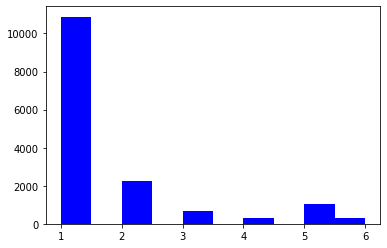

In [795]:

# DATA VISUALIZATIONS.
plt.hist(train['passenger_count'],color='blue') # there are lot of single passenger travellers, followed by 2,5,3,4,6.

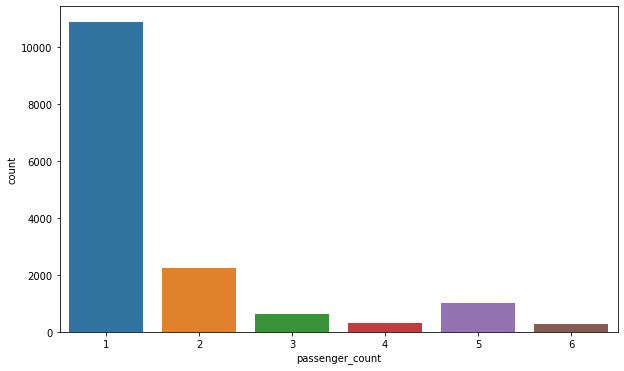

In [796]:
# Count plot on passenger count
plt.figure(figsize=(10,6))
sns.countplot(x="passenger_count", data=train)

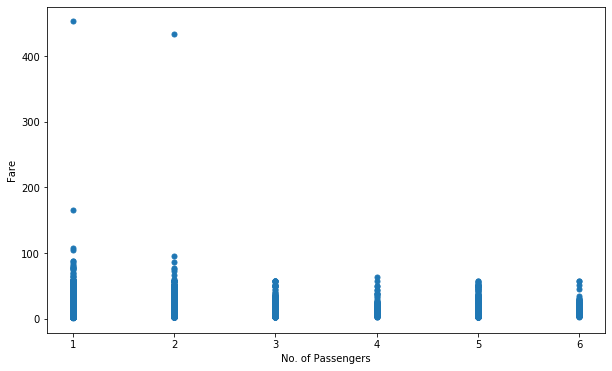

In [797]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(10,6))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=25)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()


# Observations 
By seeing the above plots we can easily conclude that:

single travelling passengers are most frequent travellers. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

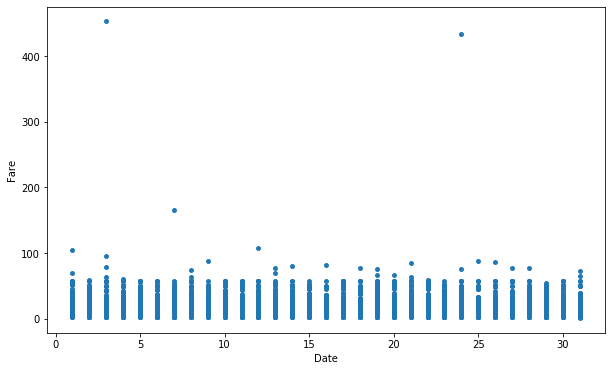

In [798]:
#Relationship between date and Fare
plt.figure(figsize=(10,6))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=15)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

(array([1341.,  479.,  481., 2047., 1360., 1520., 2117., 1703., 1871.,
        2504.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

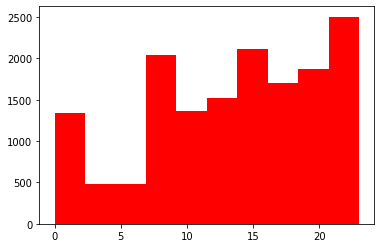

In [799]:
# number of cabs with respect to hours.  .
plt.hist(train["Hour"], color='red')

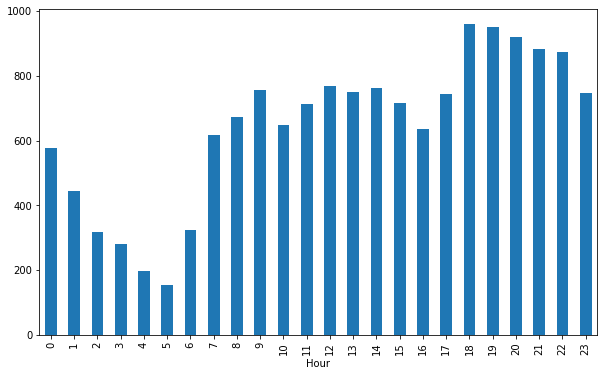

In [800]:

plt.figure(figsize=(10,6))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

Lowest cabs at 5 AM and highest at and around 6 PM i.e the office rush hours

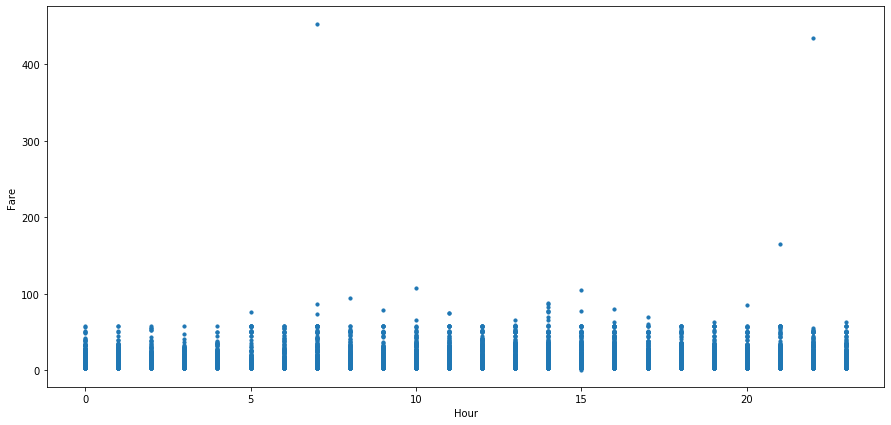

In [801]:

#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest. Hence we can assume that cabs taken early in morning and late at night are costliest

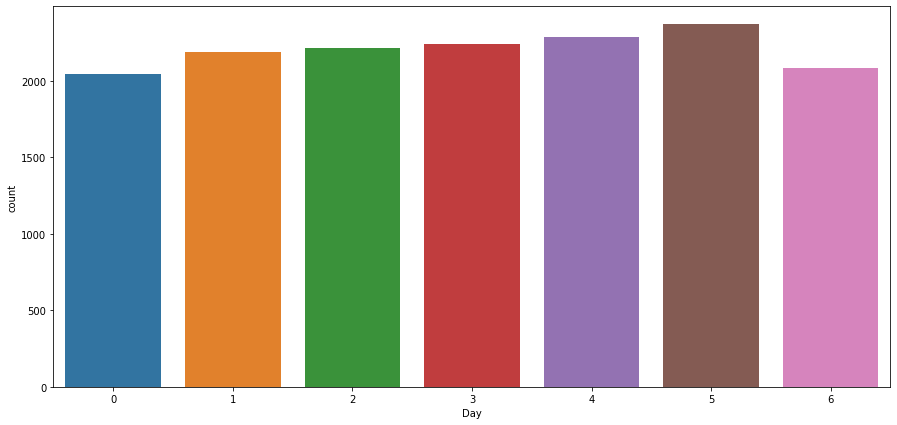

In [802]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

Observation : The day of the week does not seem to have much influence on the number of cabs ride



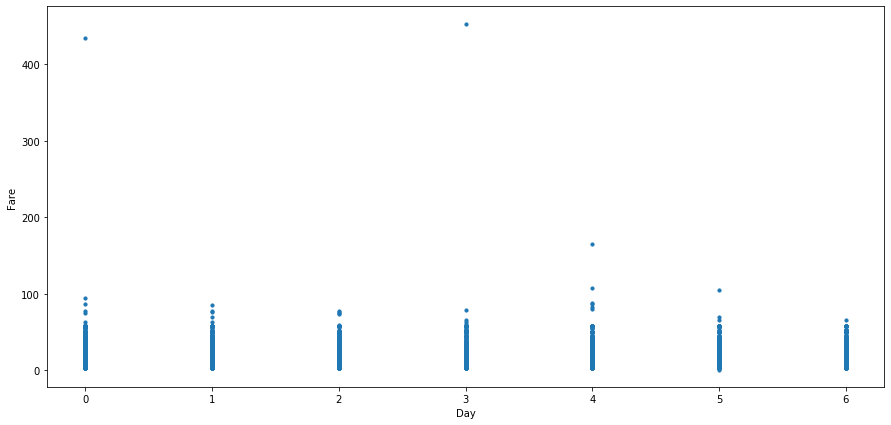

In [803]:

#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices



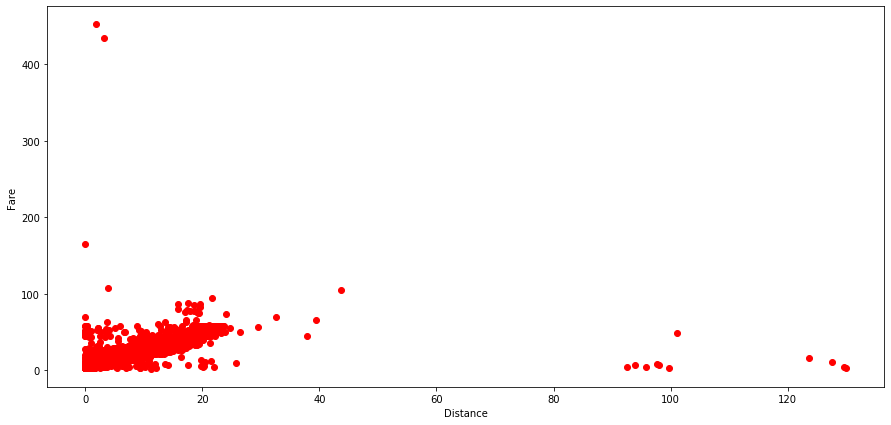

In [804]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "r")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

It is quite obvious that distance will effect the amount of fare



# Feature Scaling 


fare_amount


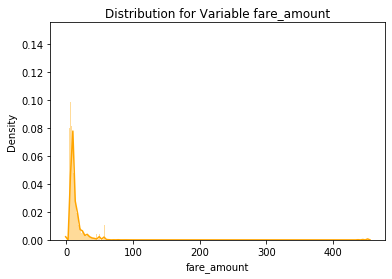

distance


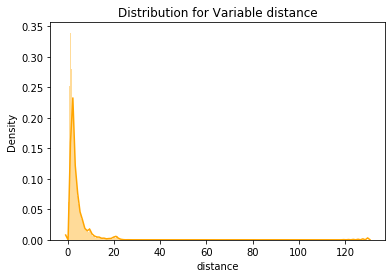

In [805]:
# checking the distribution of features...(fare_amount and Distance), rest of the features are date, time, year , hour...
#Normality check of training data is uniformly distributed or not-
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='orange')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [806]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


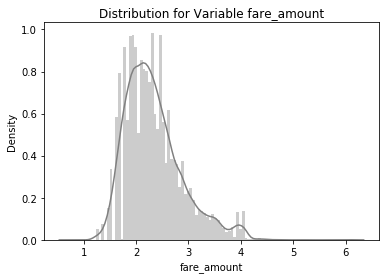

distance


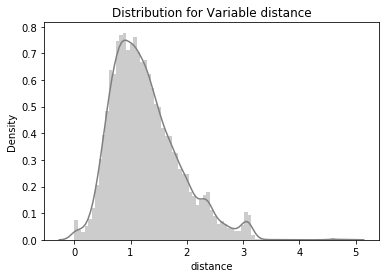

In [807]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='grey')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

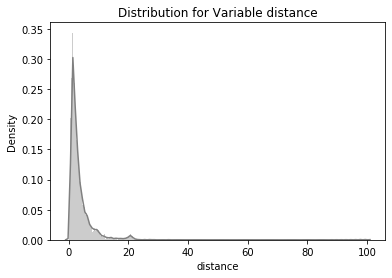

In [808]:

#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='grey')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [809]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

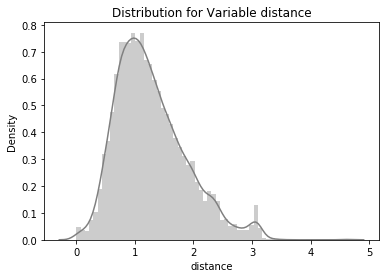

In [810]:
#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='grey')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# Feature Selection


In [811]:
#Saving all the continuous value together
numerical_val=['fare_amount','Date','distance','Hour','Day','passenger_count','year']



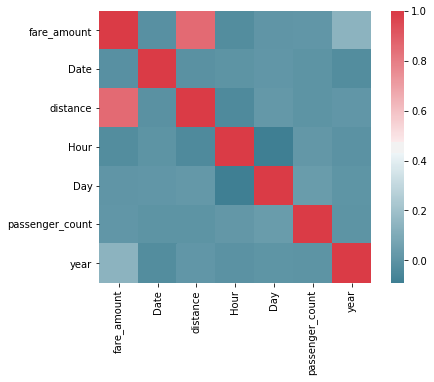

In [812]:
# FEATURE SELECTION     #### FILTER METHOD ####    ## pearson correlation plot ##
train_corr=train.loc[:,numerical_val]
f, ax = plt.subplots(figsize=(7, 5))
correlation_matrix=train_corr.corr()
#correlation plot
sns.heatmap(correlation_matrix,mask=np.zeros_like(correlation_matrix,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax).get_figure().savefig('pythonheat_map.png')

# Machine Learning Algorithms

In [813]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(12338, 7)
(3085, 7)


In [814]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
#FEATURE SELECTION BY EMBEDDED METHOD 
## LASSO REGRESSION SELECTION ## ## level 1 ##
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [815]:
sel_.get_support()

array([ True,  True,  True, False,  True,  True,  True])

In [816]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(sel_.get_support())]


In [817]:
selected_feat 

Index(['passenger_count', 'year', 'Month', 'Day', 'Hour', 'distance'], dtype='object')

In [818]:
X_train=X_train.drop(['Date'],axis=1) # Removing Date from training data

In [819]:
X_test=X_test.drop(['Date'],axis=1)   #Removing date from Test Dat

In [820]:
test=test.drop(['Date'],axis=1)  #Removing Data from orignal test data

In [821]:

### MODEL BUILDING ###
## LINEAR REGRESSION ##
LRmodel=sm.OLS(y_train,X_train).fit()

In [822]:
##Description 
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.459e+05
Date:                Sun, 16 Aug 2020   Prob (F-statistic):                        0.00
Time:                        03:12:49   Log-Likelihood:                         -1924.6
No. Observations:               12338   AIC:                                      3861.
Df Residuals:                   12332   BIC:                                      3906.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
passenger_count     0.0038      0.002      1.903      0.057      -0.000       0.008
year                0.0007   5.29e-06    124.493      0.000       0.001       0.001
Month               0.0037      0.001      4.994      0.000       0.002       0.005
Day                -0.0031      0.001     -2.414      0.016      -0.006      -0.001
Hour                0.0010      0.000      2.545      0.011       0.000       0.002
distance            0.7728      0.004    184.476      0.000       0.765       0.781
==============================================================================
Omnibus:                     6134.483   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           512874.628
Skew:                           1.500   Prob(JB):                         0.00
Kurtosis:                      34.443   Cond. No.                     3.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [823]:
#Linear regression Model
#Prediction on training data
prediction_test_LR = LRmodel.predict(X_test)

In [824]:
##### MODEL EVALUATION #####
#mape                                    #av= actual value and pv= predicted value
def mape(av, pv): 
    mape = np.mean(np.abs((av - pv) / av))*100
    return mape

In [825]:
## [predict on test data
mape(y_test,prediction_test_LR)

7.877420191977786

In [826]:
### DECISION TREE REGRESSOR ###
DTR=DecisionTreeRegressor(max_depth=10).fit(X_train,y_train)
DTR

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [827]:
#Prediction on test Data
prediction_DTR=DTR.predict(X_test)

In [828]:
## performance of decision tree regression model.
mape(y_test,prediction_DTR)

8.03801526405997

In [829]:
### RANDOM FOREST REGRESSOR ###
RF=RandomForestRegressor(n_estimators = 500).fit(X_train, y_train)

In [830]:
#predict on test data
RFprediction=RF.predict(X_test)

In [831]:
## performance of random forest regression model.
mape(y_test,RFprediction)

7.382906470432197

In [832]:
### LASSO REGRESSION ###
lasso_model = Lasso(alpha=0.005, random_state=0)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [833]:
#predict on test data.
predict_lasso=lasso_model.predict(X_test)

In [834]:
mape(y_test,predict_lasso)

7.479921507632799

# Optimizing the results with  hyper parameters tuning 

In [835]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [836]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [837]:
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)



In [838]:
#Reviewing best parameter 
view_best_params_RRF = randomcv_rf.best_params_

view_best_params_RRF

{'n_estimators': 15, 'max_depth': 9}

In [839]:
best_model = randomcv_rf.best_estimator_

In [840]:
#Predict on test data
predictions_RRF = best_model.predict(X_test)

In [841]:
mape(y_test,predictions_RRF)

7.202401062423452

In [842]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [843]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)


In [844]:
mape(y_test, predictions_gb)

8.31141221811313

In [845]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)


In [846]:
mape(y_test, predictions_GRF)

7.1999142211666545

In [847]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)
predictions_Ggb

array([2.02668174, 1.83568606, 2.8550689 , ..., 2.44668141, 2.04324133,
       2.262357  ])

In [848]:
mape(y_test, predictions_Ggb)

7.816702354693657

# Prediction of fare from provided test dataset 

We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using grid search CV for random forest model

In [849]:
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [850]:
#Predicting fare amount for provided dataset
test['Predicted_fare'] = predictions_GRF_test_Df

In [851]:
test.head()

,passenger_count,year,Month,Day,Hour,distance,Predicted_fare
0,1,2015,1,1,13,1.200946,2.386302
1,1,2015,1,1,13,1.231205,2.393768
2,1,2011,10,5,11,0.481579,1.684160
3,1,2012,12,5,21,1.085538,2.186903
4,1,2012,12,5,21,1.854312,2.797852


In [852]:
#Output
test.to_csv("test_Predicted_fare_amount.csv", index=False)